# Predicting Customer Churn

In business world, one important measure is "Churn Rate", the rate at which customers terminate the service. For example, in telecommunication, customer churn is one of the most important business health metrics, so important they have customer churn agents whose job is to call customers who are likely to leave and offer them very special deals to tempt them to stay.

In this example, we look at a dataset from telecommunication industry. Each customer profile (row) has several variables as shown in the table below.

The last column (Churn?) is the output variable we are interested in. We want to look into all customers in our database and predict the likelihood of each customer leaving the business.

*For banking, churn may be defined as the closing of the account or the absence of transactions over some predefined period.*

The following data is an example of customer database from a telecom firm.

In [16]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

# loading up data and printing them to get a general idea

churn_df = pd.read_csv('churn.csv')
col_names = churn_df.columns.tolist()

print("Column names:")
print(col_names)

to_show = col_names[:6] + col_names[-6:]

print("\nSample data:")
churn_df[to_show].head(6)

Column names:
['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?']

Sample data:


,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,9.18,6.3,6,1.70,0,False.


## Data Preprocessing

Now that we got a rough idea of what data look like let's transform data into usable format. We perform the following transformations:

1. Drop features that are not likely to help us predict churn (state, area code, phone number)
2. Transform features with 'yes / no' or 'True / False' values to 0.0 and 1.0

In [17]:
# Drop columns that we don't think would help
to_drop = ['State','Area Code','Phone','Churn?']
X = churn_df.drop(to_drop,axis=1)

# Separate target values, [Churn?] column, into another variable called churn_result
# Transform [Churn?] column to 0 and 1 (instead of False and True)
churn_result = churn_df['Churn?']
y = np.where(churn_result == 'True.',1,0)

# Transform some columns with 'yes'/'no' values and convert to 1 and 0
# X stores all features (x1 through x7)
yes_no_cols = ["Int'l Plan","VMail Plan"]
X[yes_no_cols] = X[yes_no_cols] == 'yes'
X = X.as_matrix().astype(np.float)

The following part is important. We took our 7-column feature tables and scale them. Standard scaler basically 'standardize' all feature column, so that each column has zero mean and is scaled by standard deviation.

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

print("Feature space holds %d observations and %d features" % X.shape)
print("Unique target labels:", np.unique(y))

Feature space holds 3333 observations and 17 features
Unique target labels: [0 1]


## Machine learning models

One big question is "How do we classify customers based on these data that we have??" Simple question, complex answers!

We want to build a model that is able to predict whether customers will churn (1) or not churn (0). Since the predicted response is categorical, this problem is clearly a classification problem.

For this lesson let's consider 4 classification models. We want to explore them in more details below.

### 1. Logistic Regression

We are familiar with the linear regression model already. Logistic regression model is a little step up from that.

** Linear Regression Model **

$$ h(x) = \theta_0 + \theta_1 x $$

** Logistic Regression Model **

$$ h(x) = f(\theta_0 + \theta_1 x) $$
$$ f(x) = \frac{1}{1+e^{-x}} $$

Function `f(x)` is called logistic equation. Let's plot and see how it looks like:

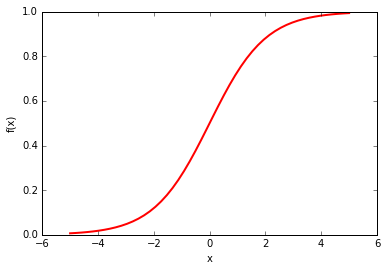

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x1 = np.linspace(-5,5,50)
fx = 1/(1 + np.exp(-x1))

plt.plot(x1, fx, c='red', linewidth=2)
plt.xlabel('x')
plt.ylabel('f(x)')

Logistic function has one important characteristic; the value of `h(x)` is bounded between 0 and 1, meaning that the predicted value cannot exceed these limits. This function is perfect for modeling categorical variables, where `h(x)` reflects the probability of the sample belonging to category 1.

Let us see an example of how to fit logistic regression on a data.

Here we will use a different sample data set to demonstrate logistic regression. Suppose that the variable `x` here is the size of patients' tumors. Variable `y` is the label whether that patient's tumor is malignant (cancer) or not. To gain intuition, let us plot the graph of x and y.

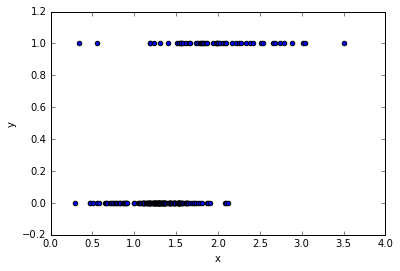

In [20]:
dat = pd.read_csv('logistic1.csv')
x2 = dat.x.reshape(214,1)
y2 = dat.y.reshape(214,1)

# Here we plot the graph of x and y
plt.scatter(x2, y2)
plt.xlabel('x')
plt.ylabel('y')


From the plot above, one can see that the value of `x` predicts the category `y` slightly. If x is high, y is more likely to be 1. If x is low, y is more likely to be zero.

We will now try to fit logistic regression to this data.

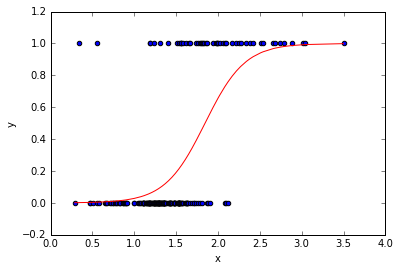

In [21]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(x2, y2)
hx = logreg.predict_proba(x2)[:,1]

plt.scatter(x2, y2)
plt.plot(x2, hx, color='red')
plt.xlabel('x')
plt.ylabel('y')

From the example above, we see how logistic function works. The red line is `h(x)` which is the prediction of logistic regression model. `h(x)` is the probability that the patient's tumor will be malignant given the size of the tumor (`x`). If `h(x) = 0.8`, it means that we predict with 80% confidence that the patient will have cancer. From the graph, if a new patient walks in and their tumor size is 2.1, we are 80% sure that he has cancer.

Note that, as in the case of linear regression, the red line is simply our prediction. The blue dots are the real data from real patients. Notice that there is disparity between red line and blue dots. So our model is not 100% correct.

We may calculate the goodness of the model. There are many ways to do it (such as the measures called cross-entropy error or ROC) for now we will do the simplest thing. If `h(x) >= 0.5`, we guess that the patient has cancer. If `h(x) < 0.5`, we guess the patient doesn't have cancer. Then, we simply calculate how many of our predictions align with the truth.

In [31]:
y_pred = logreg.predict(x2)
print("accuracy = " + str(np.mean(y2 == y_pred)*100) + '%')

accuracy = 67.8530876059%


This is not a very great model if we judge from the accuracy, but it helps us understand logistic regression for now!

If you think about it a little longer you will realized that logistic regression simply draw a simple boundary on the graph where `h(x)=0.5`.

In [36]:
x_bound = 1.8455
y_pred = logreg.predict_proba(x_bound)
print("The value of h(x): %3.3f" % y_pred[0][1])

The value of h(x): 0.500


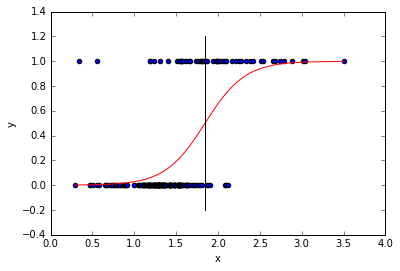

In [39]:
plt.scatter(x2, y2)
plt.plot(x2, hx, color='red')
plt.plot([x_bound,x_bound], [-0.2,1.2], color='black')
plt.xlabel('x')
plt.ylabel('y')

If `x` is below 1.8455, we predict that the patient doesn't have cancer. If above, we predict that the patient has cancer.

In general, logistic regression is nothing but drawing boundary on the graphs. For example, in the case of our housing example, fitting logistic regression fits a boundary line to minimize classification errors. In the following figure, all boundary lines have the same errors.

<img src="logisbound-01.png" width="400">

### 2. K-Nearest Neighbor

Nearest neighbor classification (or often called instance-based learning) is the laziest algorithm there is (hence the nickname of ‘lazy learning’). Here are some learning steps.

1. When the training set is given, do nothing.
2. When the testing sample, `x`, is given, find a sample that is nearest to `x`. Predict `y` of `x` to be the same as `y` of the nearest neighbor.

Example from our house classification problem. The grey dot is the sample. Sample's nearest neighbor belongs to red category, therefore our prediction of sample's category is red.

<img src=".\nn.png" width="800">

** K-Nearest Neighbor Methods ** <br>
􏰀
Find k neighbor points closest to `x`. Predict `y` of `x` to be the `y` of the majority of neighbors. If you wish, you can also assign weight to `y` according to how close each neighbor is. 

** Distance function **

One may use any distance functions. The most popular one is Euclidean distance. See [SkLearn Distance Metrics](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html) for more details.

** Parameters **

There's only one most important parameter parameter to adjust here which is `k` the number of neighbors we use. The smaller `k` the more likely it will overfit. The larger `k` will yield underfitting.

sk-learn allows you to adjust weighting functions and use more fancy neighbor search, we are going to stick to the basics for now.

** Pros and Cons **

*Advantage*<br>
1. Training takes no time.
2. Complex function fit is possible. 􏰀 
3. Information is not lost.

*Disadvantage*<br>
1. Query is slow (the more data the slower). 􏰀 
2. Storage space is huge.
3. Easily fooled by irrelevant features.

For more information and examples, check [sk-learn nearest neighbor page](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier).

### 3. Decision Tree

Decision tree is another simple machine learning models. It's really easy to understand and implement. Here's a classic example of decision tree.

You have a friend named Josh and you'd ask him everyday whether he'd go play tennis with you. Over time, you collected Josh's responses and create a decision tree model of his answers.

<img src=".\decision_tree.png" width="600">

Here the `y` variable is yes or no. And suppose we have 4 features:<br>
x1 = Outlook, {sunny, overcast, rain}<br>
x2 = Temperature, {hot, warm, cold}<br>
x3 = Humidity, {high, normal}<br>
x4 = Wind, {strong, weak}<br>

Both `x` and `y` do not have to be categorical. For example, if temperature is continuous number (0-100 degrees) the tree branch can be

x2 = Temperature, {`<28` degrees, `>=28` degrees}<br>

What decision tree models do is to split the entire input space in to grid blocks, where each block must contain data points of the same category, with as little contamination as possible.

<img src=".\block.png" width="600">

#### Decision tree algorithm

<img src=".\dt1.png" width="600">
<img src=".\dt2.png" width="600">

The algorithm makes all these decisions based on the principle of probability and information theory. The whole theory is too in depth to cover here. For those who are interested in learn more, please check [this page](http://www.saedsayad.com/decision_tree.htm).

To put it simply, decision tree calculates how much knowing about each x feature leads to better knowledge about y (information gain). It will choose to split along the x that leads to best information gain. Once it has chosen which x to split, it will pick the split point by minimizing error of classification on both sides of the split.

#### Random Forest Algorithm

Since decision trees are known to be prone to overfitting. Mathematicians come up with the enhanced version called random forest algorithm. Random forests construct multiple decision trees simultaneously, each started at different random initial conditions. When it's time to make predictions, all trees might have different opinions about how the sample should be classified. Random forests basically take votes from all trees and make the final guess from the majority. This is known to improve performance dramatically.

### 4. Support Vector Machine

Support vector machine (or SVM) is a difficult algorithm even for some math-savvy people. So if you do not get it, it's okay. We are just going to touch on the geometric interpretation of the algorithm.

#### Support vector and kernel

There are two terms you need to understand. <br>
**Support Vector** is some training samples from your data (some $x^1$, $x^2$, etc.) <br>
**Kernel** is the similarity function. The definition of the similarity between two samples. Kernel function is a function of two variables $K(x^i,x^j)$. For example, a Gaussian kernel in the image below.<br>

Suppose u here is the patient's tumor size. The similarity between patient i who has tumor size = 3 and patient j with tumor size = 4 is $K(0,1)$ or roughly 0.5. If patient i and patient j are similar, the value $K(x^i,x^j)$ will be high.<br><br>

<img src=".\eqn_sw2s.png" width=300>

<img src=".\gaussiankernel.jpg" width=400>

You see that the vocabs are unnecessarily difficult, but the concepts are simple.

#### Feature construction

SVM construct a whole new space of features by calculating the similarities (kernel) between the sample we want to predict to all support vectors. 

<img src=".\svm.png" width=400>

To put simply, we randomly pick some vectors from all available samples to be our support vectors (say, [$x^1$, $x^2$, ...]. When it's time to predict the category of a given sample ($x^i$), we calculate the distance between that sample to all support vectors.

$$f^1(x^i) = K(x^i, x^1)$$<br>
$$f^2(x^i) = K(x^i, x^2)$$<br>
$$...$$

Then, we use [$f^1(x^i)$, $f^1(x^i)$, ...] as a new set of features for our classification.

This simply means that we transform the old set of features (`x`) into a new set of features (`f`), for simpler classification.

<img src=".\slide_19.jpg" width=600>
picture credit: Statnikov et al., A Gentle Introduction to Support Vector Machines in Biomedicine.

#### Classification

After we reconstruct the data in a new feature space, we are now ready to classify. 

SVM has its own way of finding optimal solution for classification. We will not go into the details here, just try to gain intuition. First, we will be plotting data in the feature space, not the regular x1 and x2 space. Then, SVM algorithm will try to construct an optimal boundary line between data. The figure below demonstrates what SVM deems optimal. We are trying to draw a boundary that separates data points belonging to blue and red categories. The middle figure demonstrates the non-optimal boundary where the category members are located too close to the boundary. The right figure demonstrates the optimal boundary where the category members are located furthest from the boundary. This is the solution SVM is trying to find. It adjusts the boundary until it achieves the optimal boundary-to-sample distance.

<img src=".\svm_bound.png" width=700>

After the boundary is trained, new sample will be categorized according to such boundary. If the sample lands on the right side of the boundary, we predict red, if the left side, we predict blue.

### Training the model

Now we have our features all preprocessed and our target formatted. Let us have fun with some model training.

Remember, to prevent overfitting, we recommended dividing data into training and testing sets. Train the model with the training set and test the model with the testing set. This process is called cross-validation.

To be even more robust, we can do k-fold cross-validation. This means the original data are randomly partitioned into k chunks. In each round of validation, a chunk of data is used as the testing set, while the other k-1 chunks are used as training set. After all k rounds are completed the model performances are averaged across k rounds to give a single metric of model validated result.


sklearn provides a simple way to do this, with cross_validation module.

This function is written to perform validation quickly on any model held in the variable `clf_class`. The function first construct k data chunks. Loop through all the chunks. Construct a model based on variables we specify in `**kwargs`. Fit the model with training set and return predictions on the testing set.


In [5]:
from sklearn.cross_validation import KFold

def run_cv(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    
    # Iterate through folds
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred

Another function, `accuracy` took the predicted categories and actual categories (churn or not churn) and compare them to give model accuracy score (0%-100%).

In [6]:
def accuracy(y_true,y_pred):
    # NumPy interprets True and False as 1. and 0.
    return np.mean(y_true == y_pred)

Then we will use the cross validation function that we just wrote to test 4 classic classification models.

In [8]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.svm import SVC


print("Logistic regression:")
print("%.3f" % accuracy(y, run_cv(X,y,LR)))
print("K-nearest-neighbors:")
print("%.3f" % accuracy(y, run_cv(X,y,KNN)))
print("Random forest:")
print("%.3f" % accuracy(y, run_cv(X,y,RF)))
print("Support vector machines:")
print("%.3f" % accuracy(y, run_cv(X,y,SVC)))

Logistic regression:
0.861
K-nearest-neighbors:
0.893
Random forest:
0.945
Support vector machines:
0.917


So it appears here that Random forest is the best model out of all four. Note that these models are used without any configurations. With more tweaking, we can possibly get better performance.

**Reference**

Churn dataset and some codes are modified from [yhat](http://blog.yhat.com/posts/predicting-customer-churn-with-sklearn.html).